<a href="https://colab.research.google.com/github/ishtarpcamo/ishtar/blob/main/Answers%20to%20questions%20in%20section%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

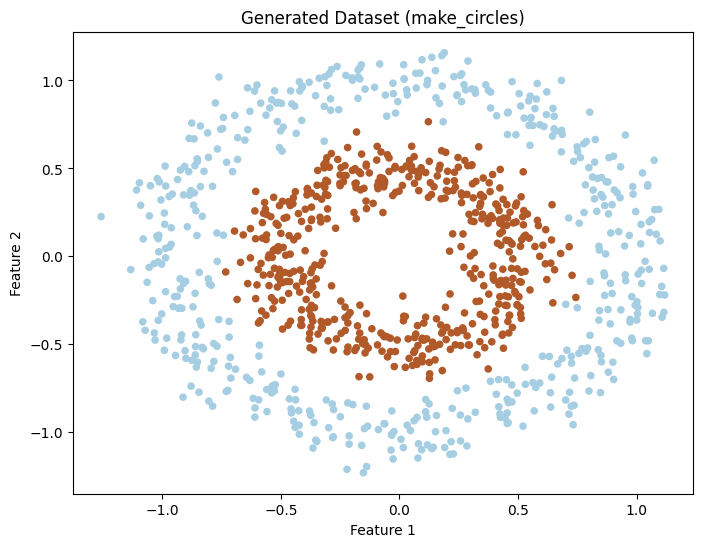

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset (make_circles)')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# بارگذاری داده‌ها و تقسیم به دو قسمت آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد و آموزش مدل اول (Logistic Regression)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# ایجاد و آموزش مدل دوم (Linear SVM)
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

# پیش‌بینی برای داده‌های آزمون
y_pred_lr = model_lr.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

# محاسبه دقت مدل‌ها
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("دقت مدل Logistic Regression:", accuracy_lr)
print("دقت مدل Linear SVM:", accuracy_svm)


دقت مدل Logistic Regression: 0.46
دقت مدل Linear SVM: 0.46


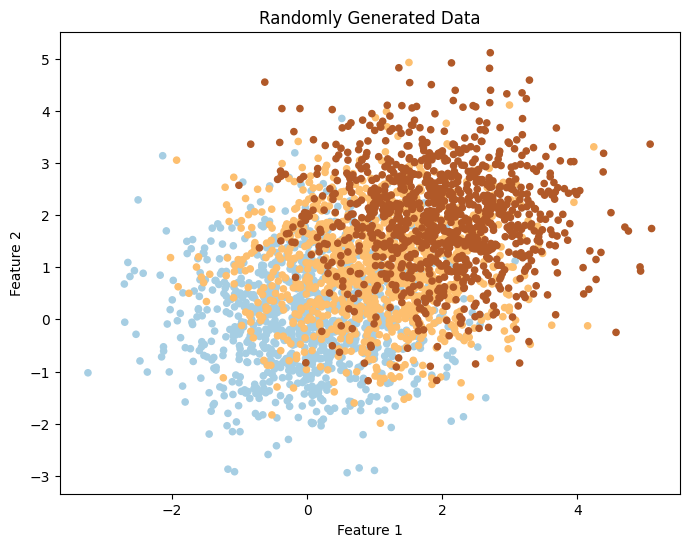

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# تولید داده‌های تصادفی با تعداد کلاس و ویژگی‌های دلخواه
def generate_data(num_classes, num_features, num_samples, cluster_std, random_state):
    np.random.seed(random_state)
    X = np.zeros((num_samples * num_classes, num_features))
    y = np.zeros(num_samples * num_classes)

    for i in range(num_classes):
        X[i*num_samples:(i+1)*num_samples, :] = np.random.normal(loc=i, scale=cluster_std, size=(num_samples, num_features))
        y[i*num_samples:(i+1)*num_samples] = i

    return X, y

# ایجاد داده‌های تصادفی
X, y = generate_data(num_classes=3, num_features=2, num_samples=1000, cluster_std=1.0, random_state=42)

# نمایش داده‌ها
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Data')
plt.show()


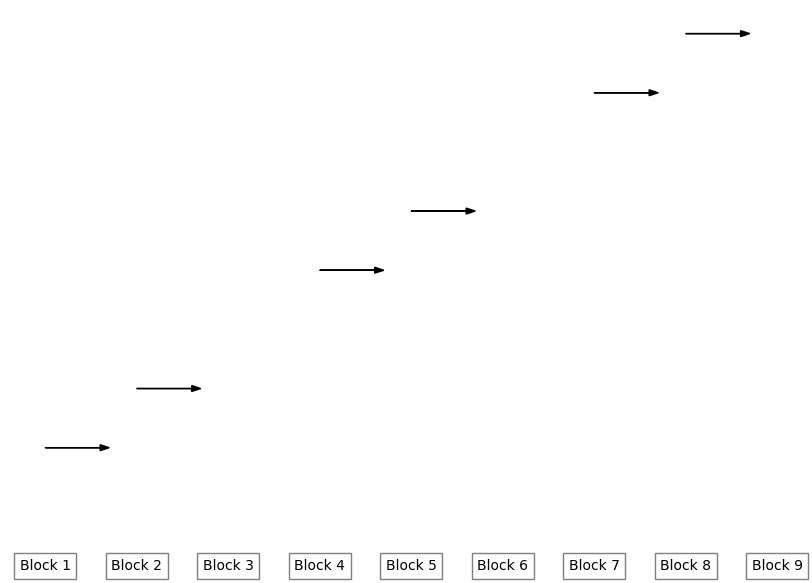

In [11]:
import matplotlib.pyplot as plt

# تعریف بلوک‌ها
blocks = {
    1: None,
    2: [1],
    3: [2],
    4: None,
    5: [4],
    6: [5],
    7: None,
    8: [7],
    9: [8]
}

# ایجاد دیاگرام
plt.figure(figsize=(10, 6))
for block, connections in blocks.items():
    if connections:
        for connection in connections:
            plt.arrow(connection, block, 0.6, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.text(block, 0, f'Block {block}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.axis('off')
plt.show()


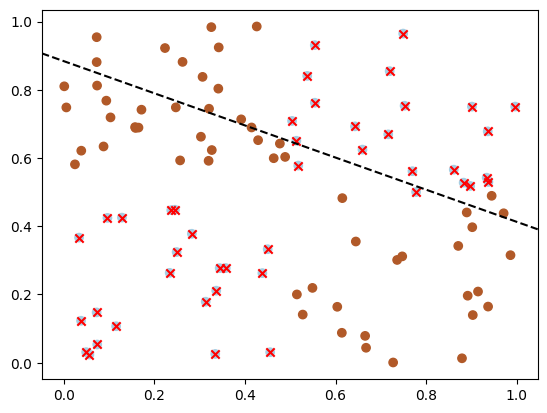

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# تولید داده‌های تصادفی برای آموزش مدل
X = np.random.rand(100, 2)
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5)

# آموزش مدل SVM
model = svm.SVC(kernel='linear')
model.fit(X, y)

# رسم مرز تصمیم‌گیری و نواحی تصمیم‌گیری
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

# نمونه‌های اشتباه طبقه‌بندی شده را با رنگ متفاوت نمایش دهید
y_pred = model.predict(X)
wrong_samples = X[y != y_pred]
plt.scatter(wrong_samples[:, 0], wrong_samples[:, 1], c='red', marker='x')

plt.show()
